In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

In [3]:
import pandas as pd

old_data = pd.read_csv('./untitled.txt', delimiter=';', decimal=',', header=None)

In [4]:
bins = old_data[0].values
data = old_data.values[:, 2:].T
bins.shape, data.shape

((37,), (20, 37))

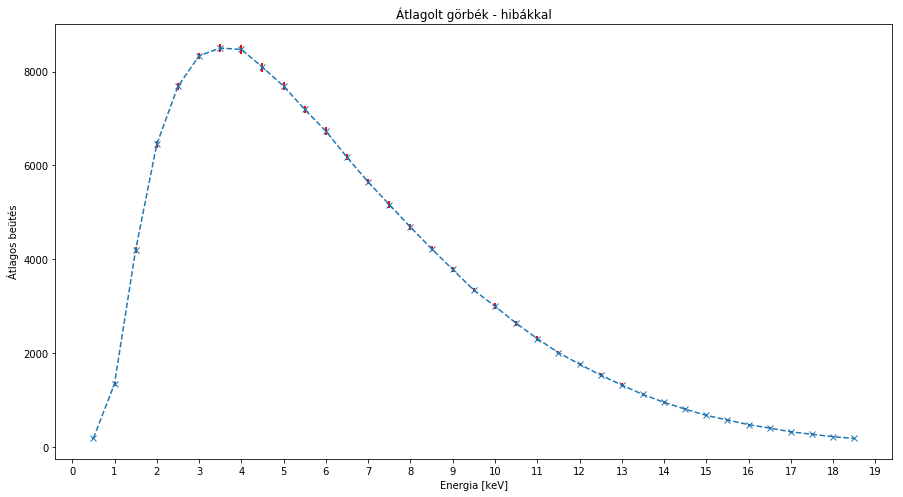

In [5]:
plt.figure(figsize=(15, 8))
plt.errorbar(bins, np.average(data, axis=0), yerr=np.std(data, axis=0), marker='x', elinewidth=2., fmt='--', ecolor='r')
plt.xticks(np.linspace(0, 19, 20))
plt.xlabel('Energia [keV]')
plt.ylabel('Átlagos beütés')
plt.title('Átlagolt görbék - hibákkal')
plt.savefig('atlagolt-gorbek-hibakkal.png', dpi=200)
plt.show()

[0.86061804] [0.00148431]


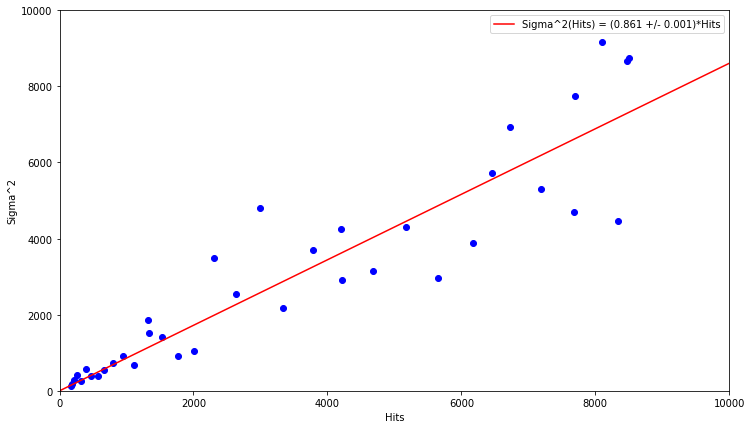

In [6]:
std_hits = np.std(data, axis=0)**2
avg_hits = np.mean(data, axis=0)

def linear(x, a):
    return a*x

popt, pcov = curve_fit(linear, avg_hits, std_hits, p0=[1.])
perr = np.diag(pcov)
print(popt, perr)

plt.figure(figsize=(12, 7))
plt.plot(avg_hits, std_hits, 'bo')
x = np.linspace(0, 10000, 800)
plt.ylabel('Sigma^2')
plt.xlabel('Hits')
plt.plot(x, linear(x, popt[0]), 'r-',
         label='Sigma^2(Hits) = (%.3f +/- %.3f)*Hits' % (popt[0], perr[0]))
plt.xticks(np.linspace(0, 10000, 6))
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.legend()
plt.savefig('szoras.png', dpi=150)
plt.show()

In [7]:
from sklearn.preprocessing import normalize

normalized_data= normalize(data, norm='l1')
avg_energy = np.matmul(normalized_data, bins.T)
np.mean(avg_energy), '+/-', np.std(avg_energy) #keV

(6.1875438805449114, '+/-', 0.007615871094657038)

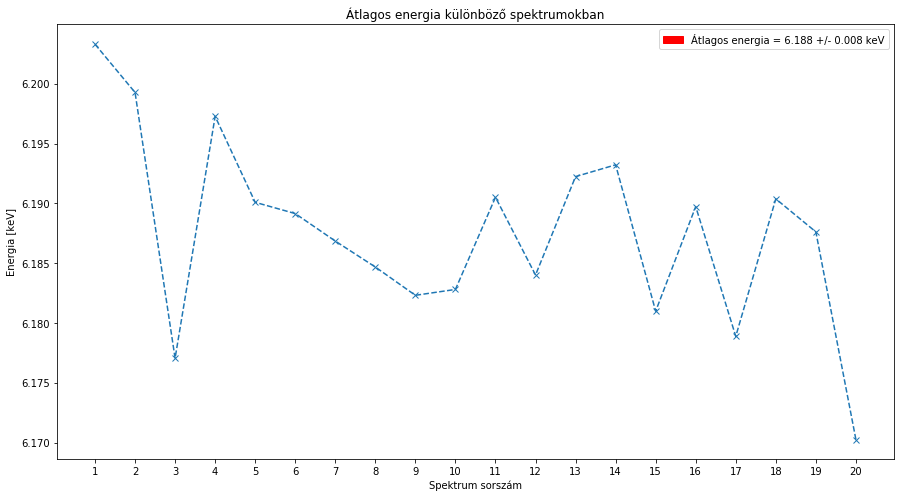

In [8]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red',
                           label='Átlagos energia = %.3f +/- %.3f keV' % (np.mean(avg_energy), np.std(avg_energy)))

plt.figure(figsize=(15, 8))
plt.errorbar(np.linspace(1, 20, 20), avg_energy, yerr=0, marker='x', elinewidth=1., fmt='--', ecolor='b')
plt.xticks(np.linspace(1, 20, 20))
plt.xlabel('Spektrum sorszám')
plt.ylabel('Energia [keV]')
plt.title('Átlagos energia különböző spektrumokban')
plt.legend(handles=[red_patch])
plt.savefig('atlagos-energia.png', dpi=200)
plt.show()

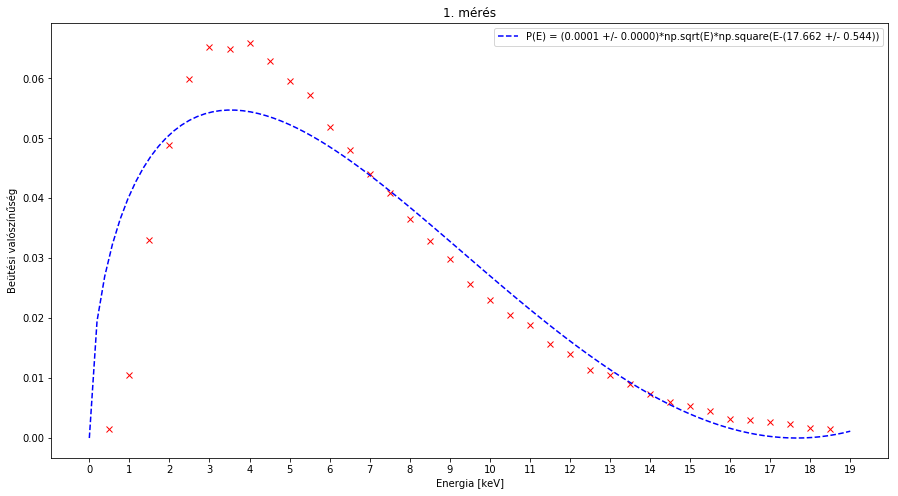

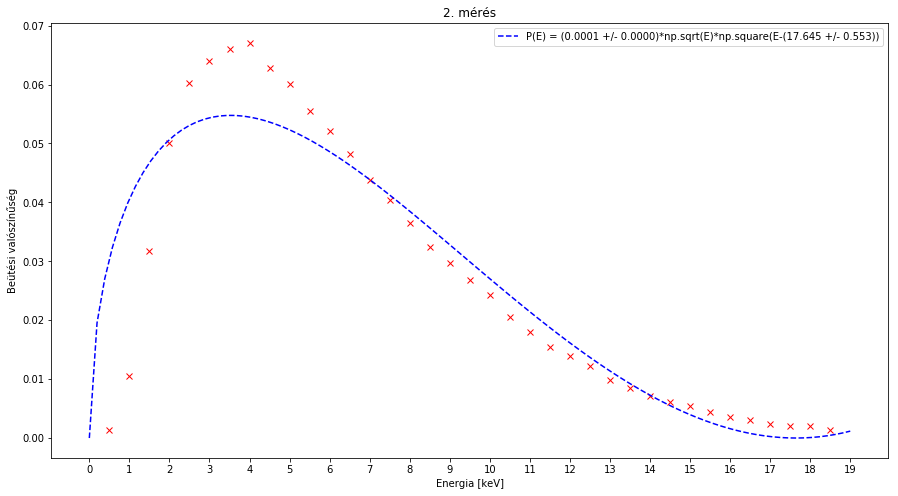

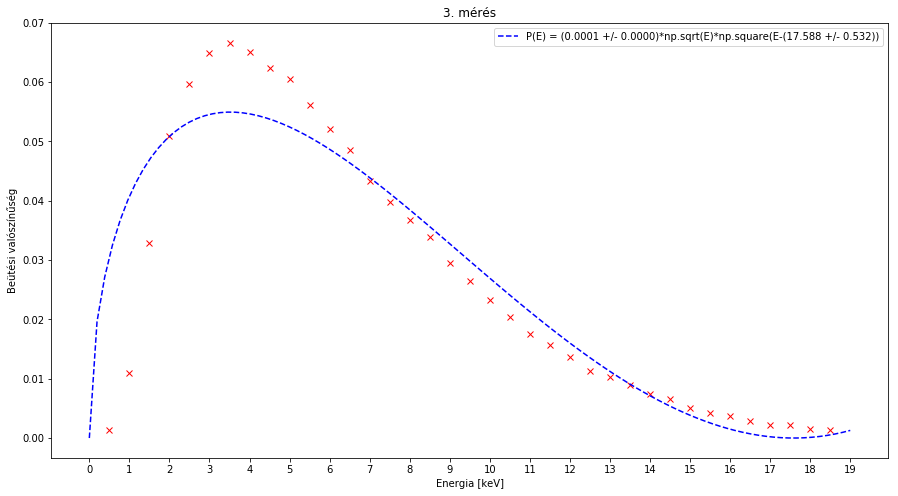

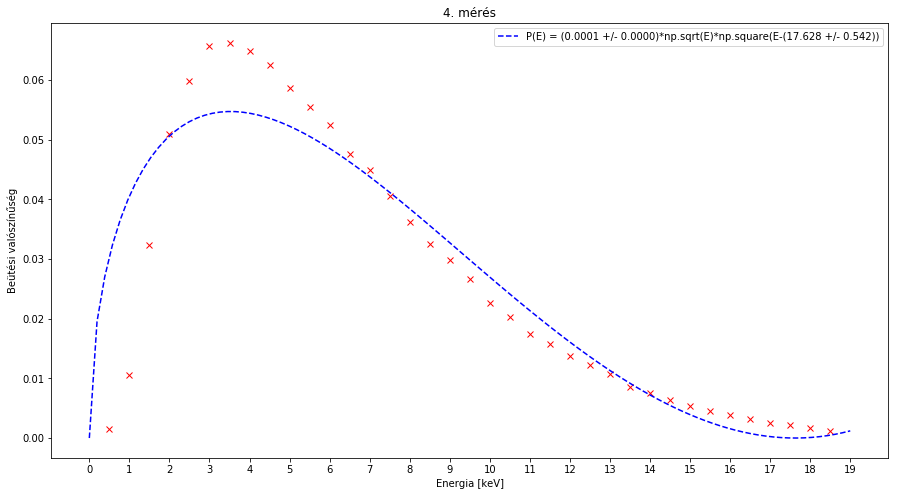

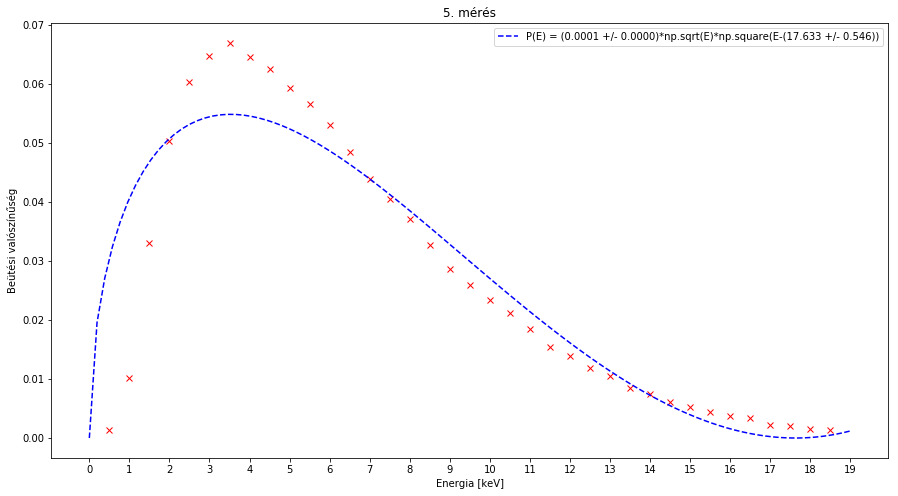

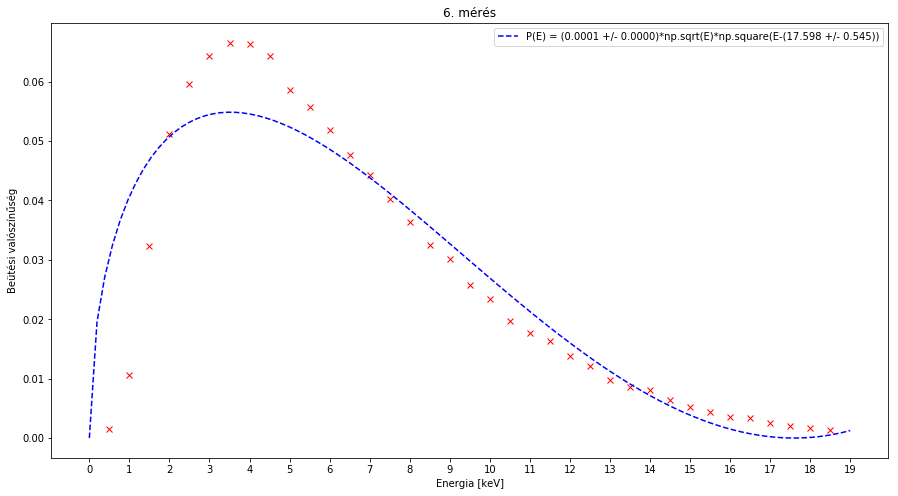

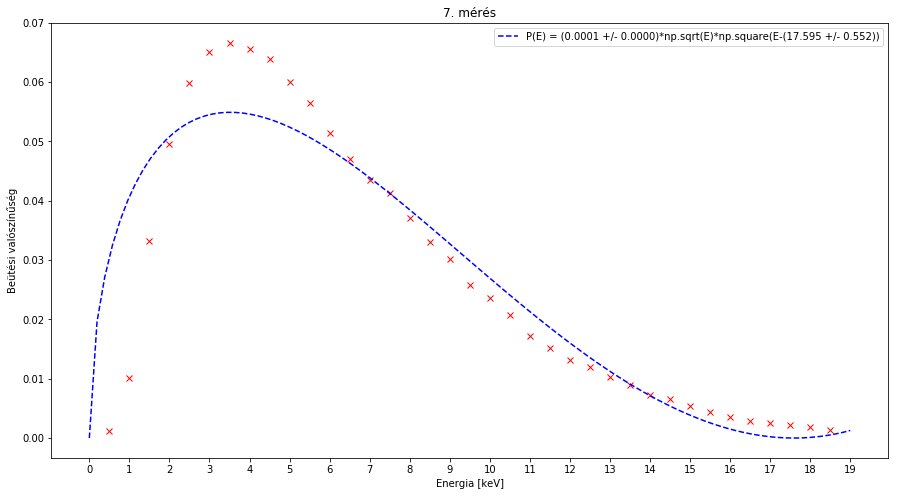

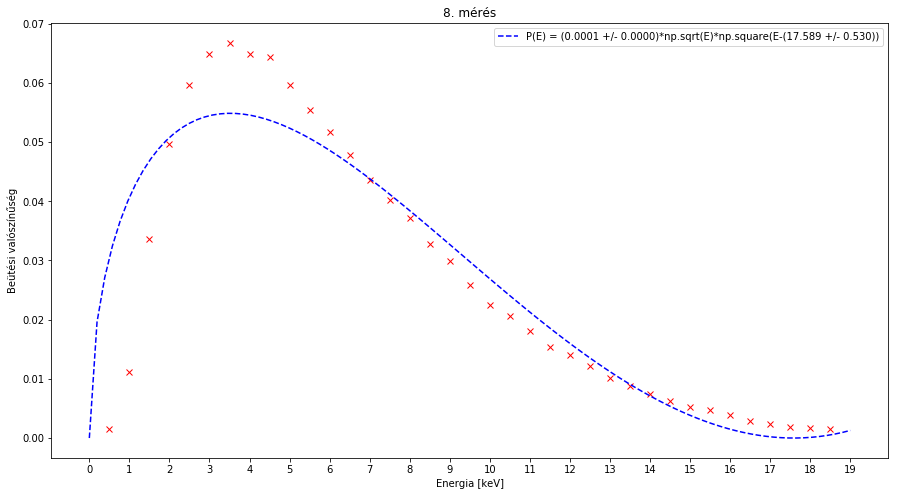

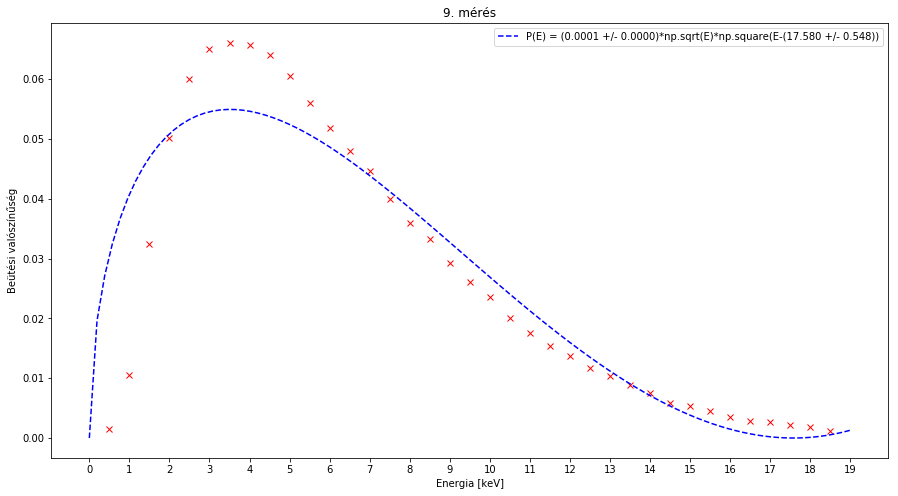

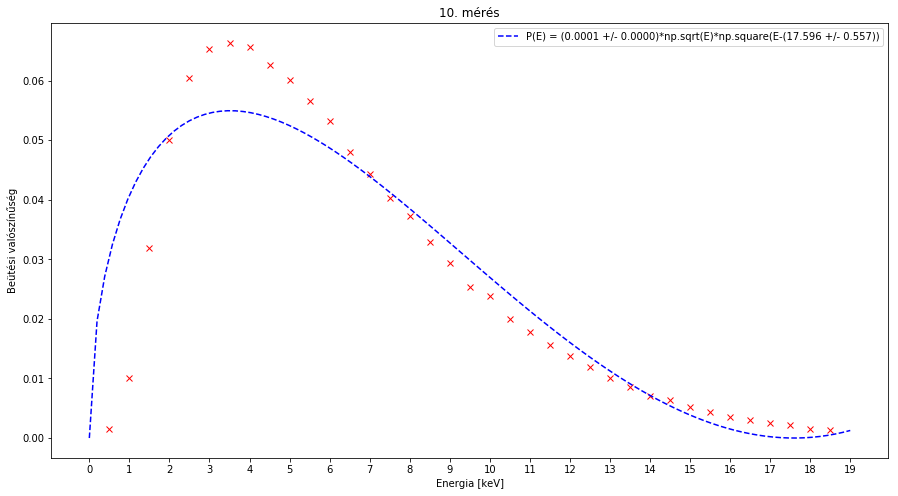

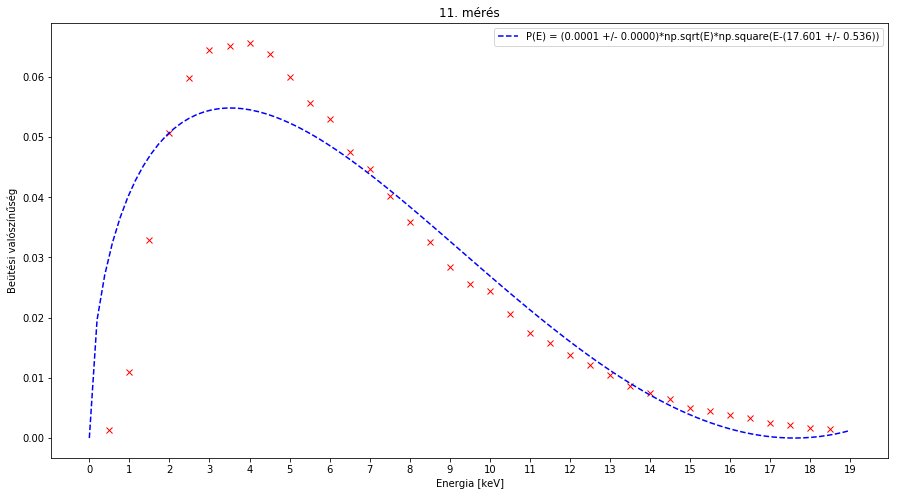

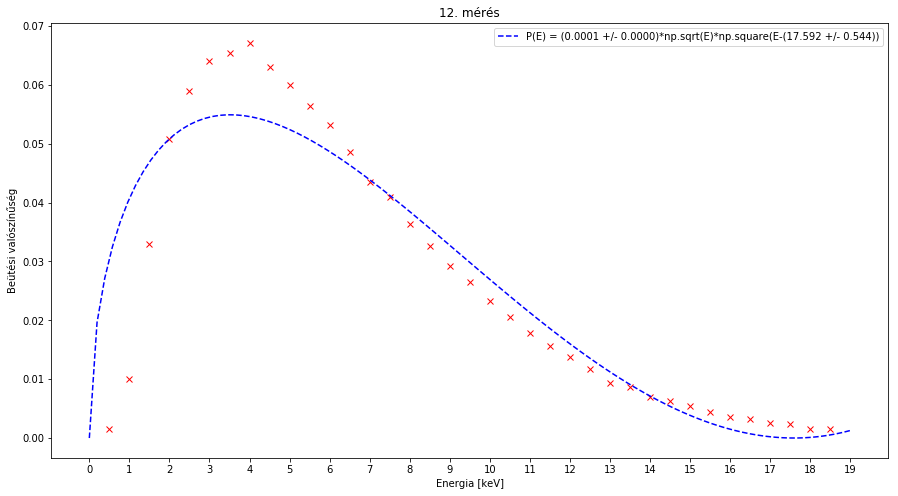

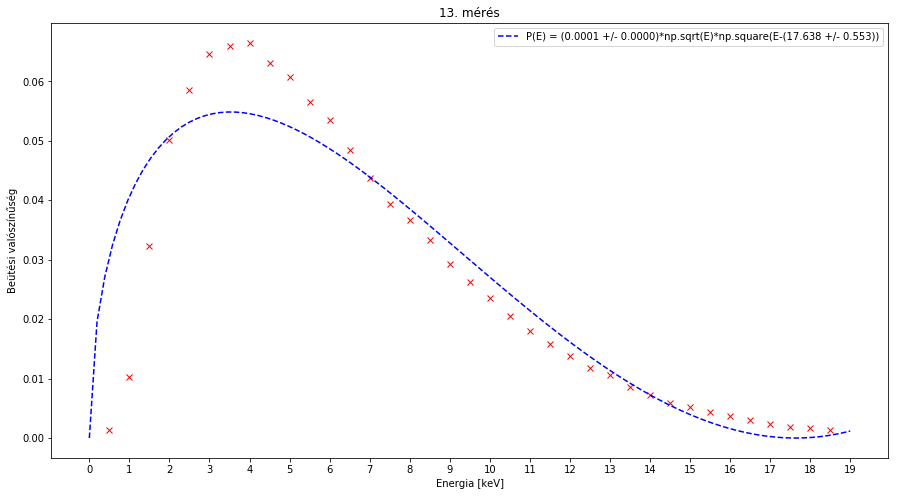

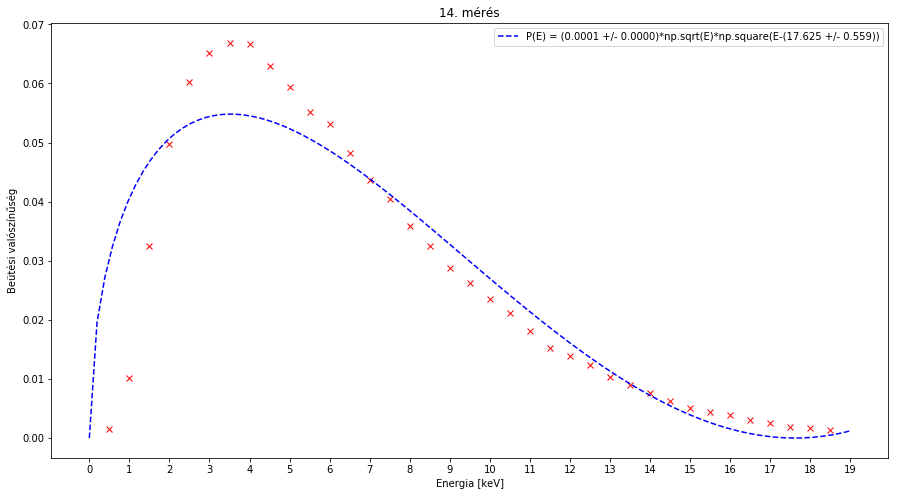

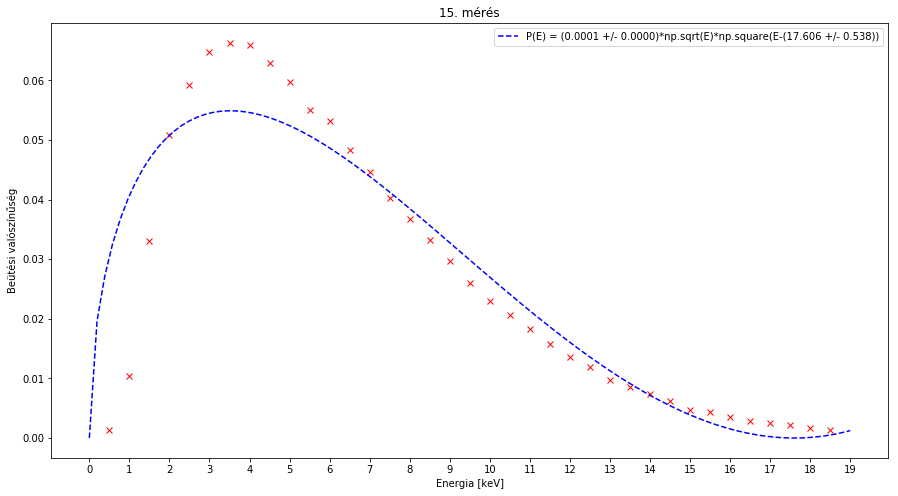

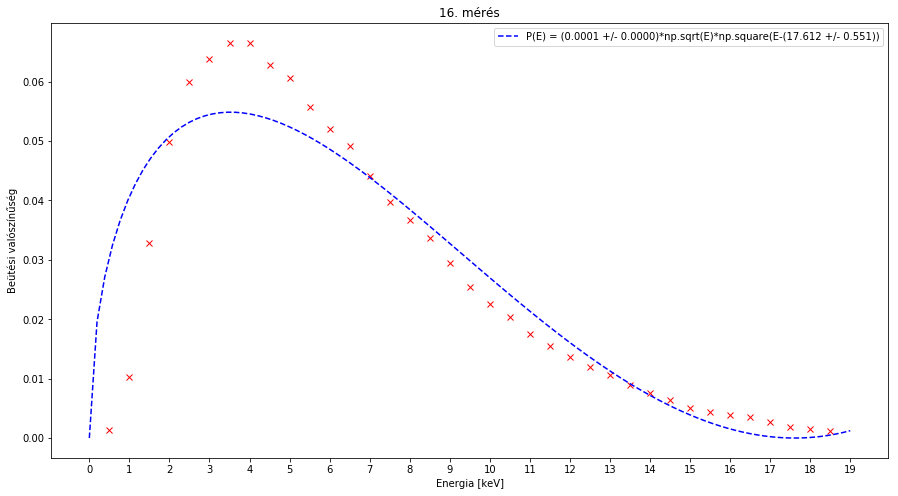

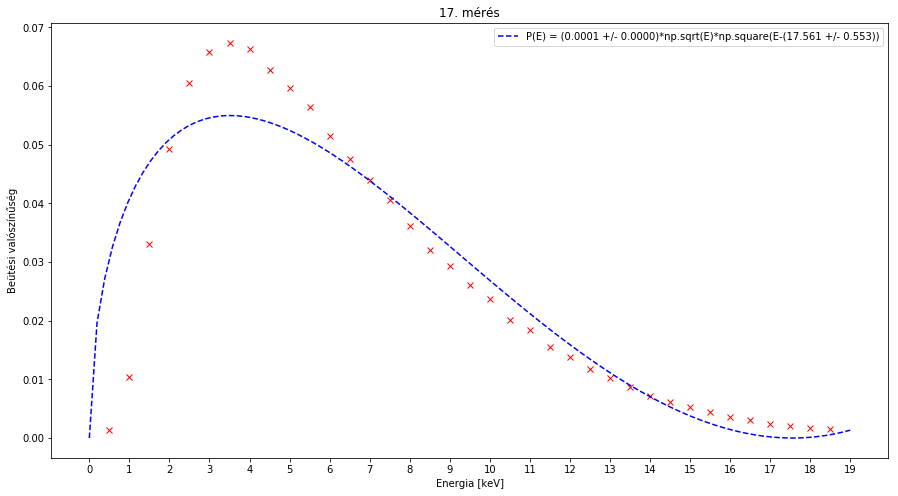

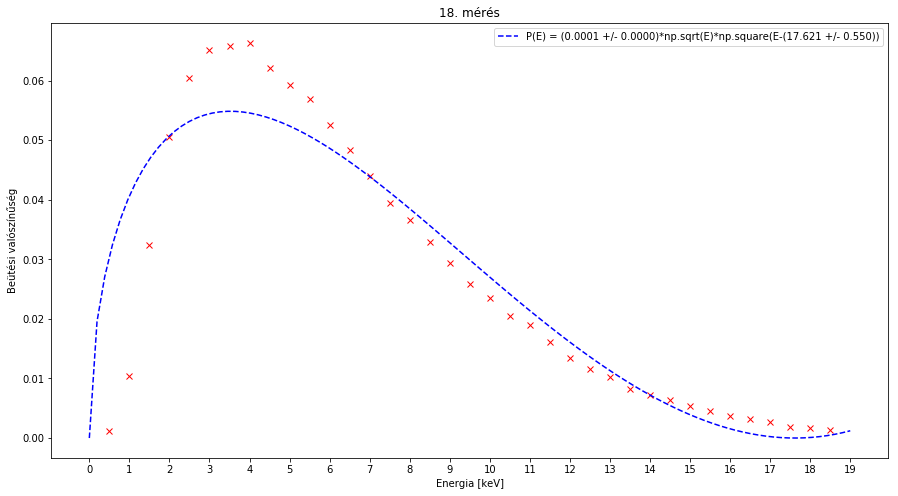

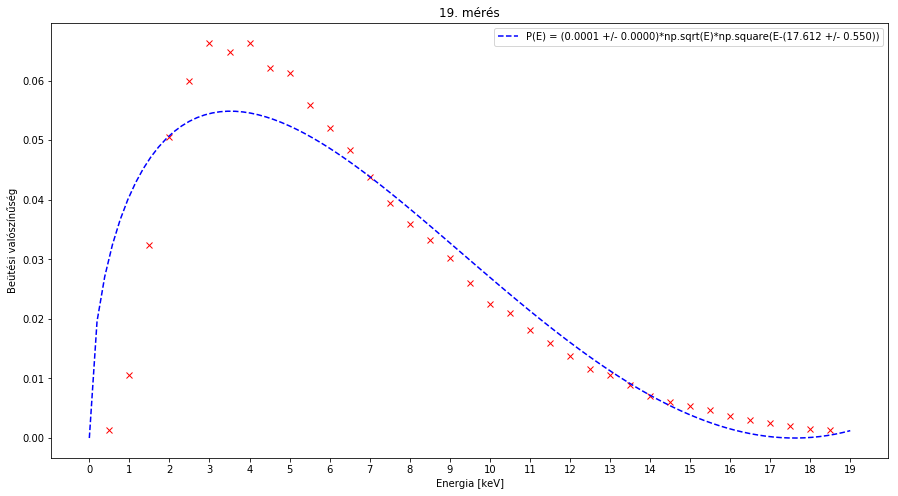

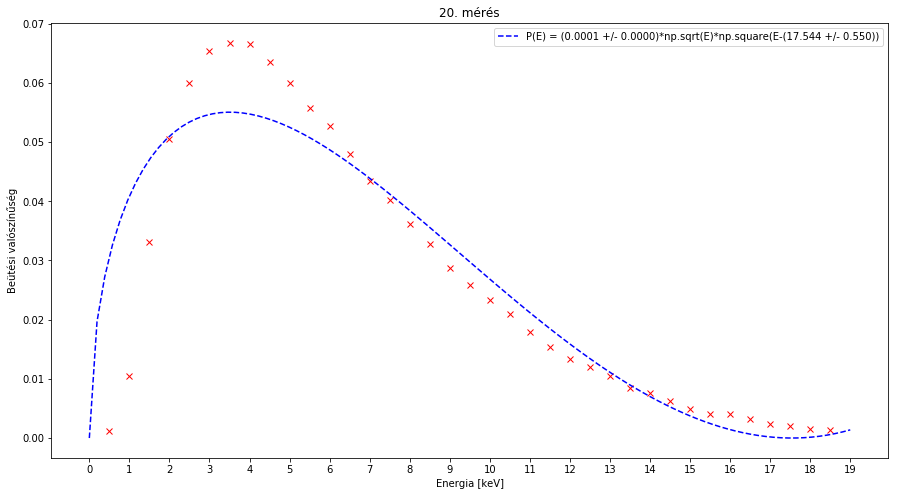

In [17]:
def prob_density(E, N, E0):
    return N*np.sqrt(E)*np.square(E0-E)
popts = []
perrs = []
for spectrum_ind in range(0, data.shape[0], 1):
    
    popt, pcov = curve_fit(prob_density, bins,
                           normalize(data[spectrum_ind, :].reshape(1, -1), norm='l1').reshape(bins.shape),
                           p0=[0.01, avg_energy[spectrum_ind]])
    perr = np.diag(pcov)
    popts.append(popt)
    perrs.append(perr)
    
    plt.figure(figsize=(15, 8))
    plt.plot(bins, normalize(data[spectrum_ind, :].reshape(1, -1), norm='l1').reshape(bins.shape), 'rx')
    x = np.linspace(0, 19, 100)
    plt.plot(x, prob_density(x, popt[0], popt[1]), 'b--',
             label='P(E) = (%.4f +/- %.4f)*np.sqrt(E)*np.square(E-(%.3f +/- %.3f))' %
             (popt[0], perr[0], popt[1], perr[1]))
    plt.xticks(np.linspace(0, 19, 20))
    plt.xlabel('Energia [keV]')
    plt.ylabel('Beütési valószínűség')
    plt.title('%d. mérés' % (spectrum_ind + 1))
    plt.legend()
    plt.savefig('atlagolt-gorbek-hibakkal%d.png' % spectrum_ind, dpi=200)
    plt.show()

In [15]:
for i in range(len(popts)):
    print("%.4f $\pm$ %.5f & %.3f $\pm$ %.3f \\\ \hline" % (popts[i][0], perrs[i][0], popts[i][1], perrs[i][1]))

0.0001 $\pm$ 0.00000 & 17.662 $\pm$ 0.544 \\ \hline
0.0001 $\pm$ 0.00000 & 17.645 $\pm$ 0.553 \\ \hline
0.0001 $\pm$ 0.00000 & 17.588 $\pm$ 0.532 \\ \hline
0.0001 $\pm$ 0.00000 & 17.628 $\pm$ 0.542 \\ \hline
0.0001 $\pm$ 0.00000 & 17.633 $\pm$ 0.546 \\ \hline
0.0001 $\pm$ 0.00000 & 17.598 $\pm$ 0.545 \\ \hline
0.0001 $\pm$ 0.00000 & 17.595 $\pm$ 0.552 \\ \hline
0.0001 $\pm$ 0.00000 & 17.589 $\pm$ 0.530 \\ \hline
0.0001 $\pm$ 0.00000 & 17.580 $\pm$ 0.548 \\ \hline
0.0001 $\pm$ 0.00000 & 17.596 $\pm$ 0.557 \\ \hline
0.0001 $\pm$ 0.00000 & 17.601 $\pm$ 0.536 \\ \hline
0.0001 $\pm$ 0.00000 & 17.592 $\pm$ 0.544 \\ \hline
0.0001 $\pm$ 0.00000 & 17.638 $\pm$ 0.553 \\ \hline
0.0001 $\pm$ 0.00000 & 17.625 $\pm$ 0.559 \\ \hline
0.0001 $\pm$ 0.00000 & 17.606 $\pm$ 0.538 \\ \hline
0.0001 $\pm$ 0.00000 & 17.612 $\pm$ 0.551 \\ \hline
0.0001 $\pm$ 0.00000 & 17.561 $\pm$ 0.553 \\ \hline
0.0001 $\pm$ 0.00000 & 17.621 $\pm$ 0.550 \\ \hline
0.0001 $\pm$ 0.00000 & 17.612 $\pm$ 0.550 \\ \hline
0.0001 $\pm$

In [18]:
# with fermi function
def prob_density_fermi(E, eta):
    return eta**2*prob_density(E, N, E0)*2*np.pi*Y(eta)/(1-np.exp(-2*np.pi*Y(eta)))

def Y(eta):
    return 3./137.*(1 + eta**2)**(1./2.)/eta # Beta - emission

def fixed_prob(E, parametes):
    parameters = N, E0, eta
    return prob_density(E, eta)

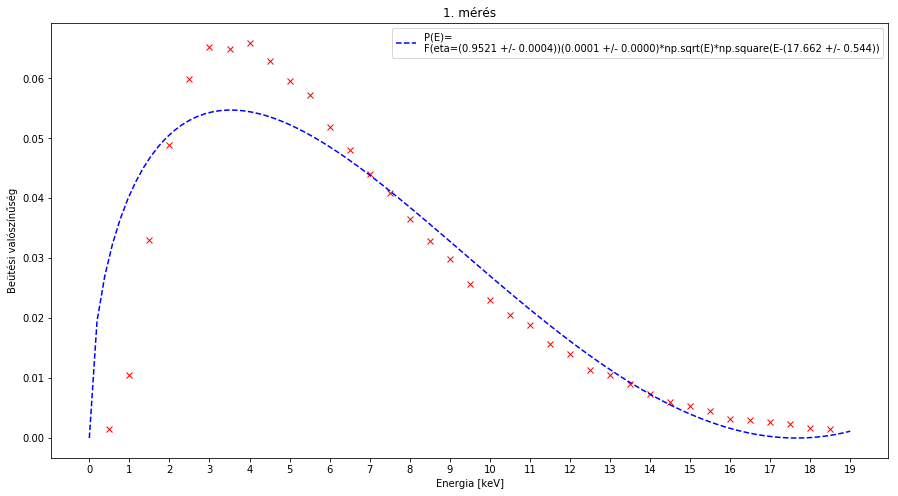

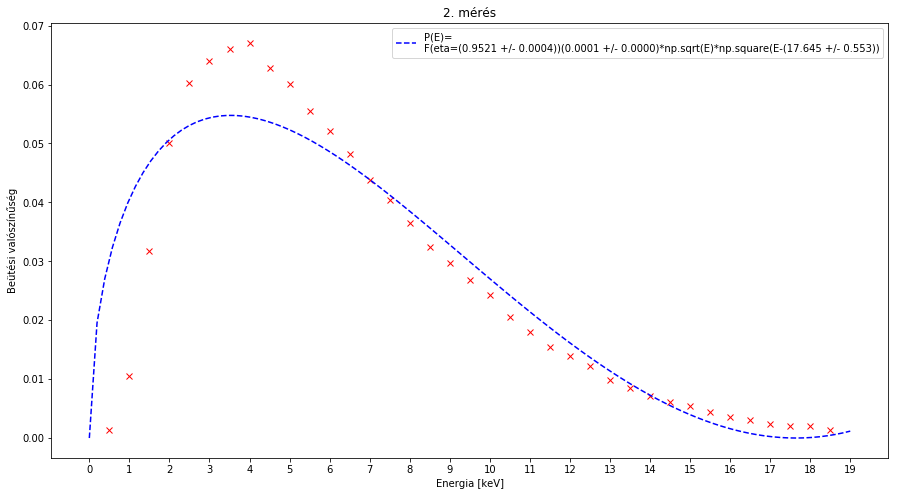

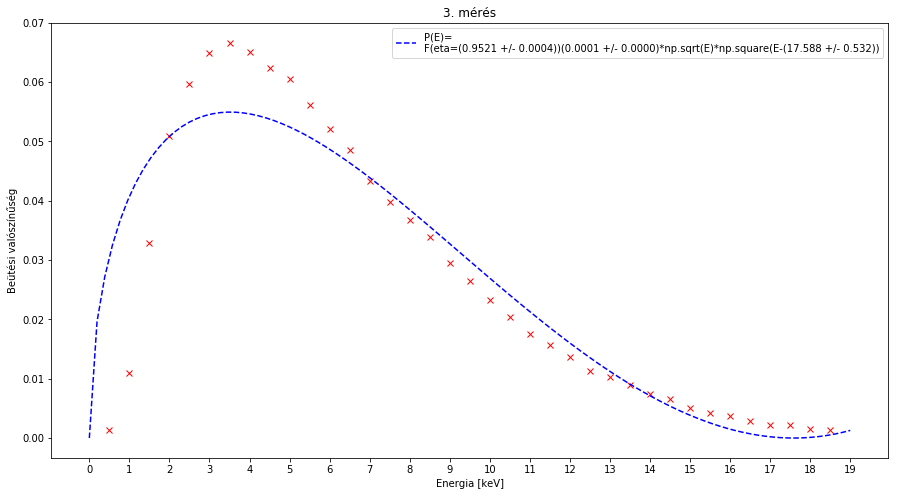

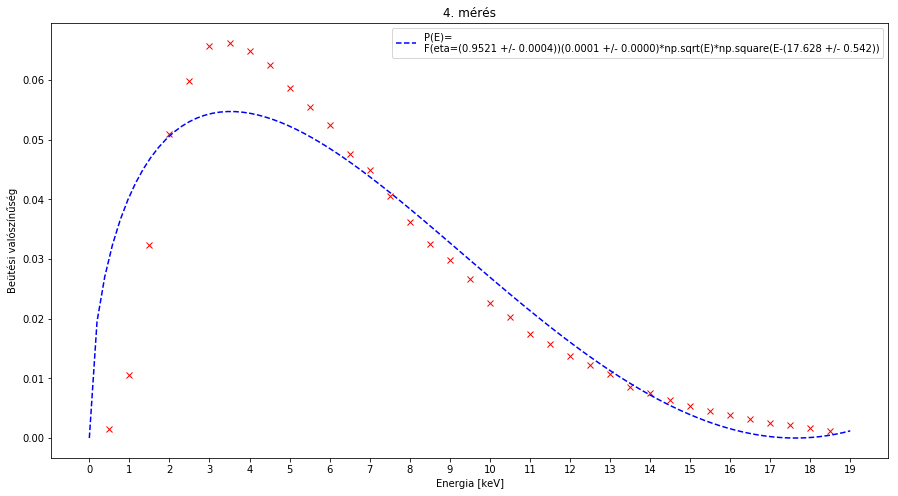

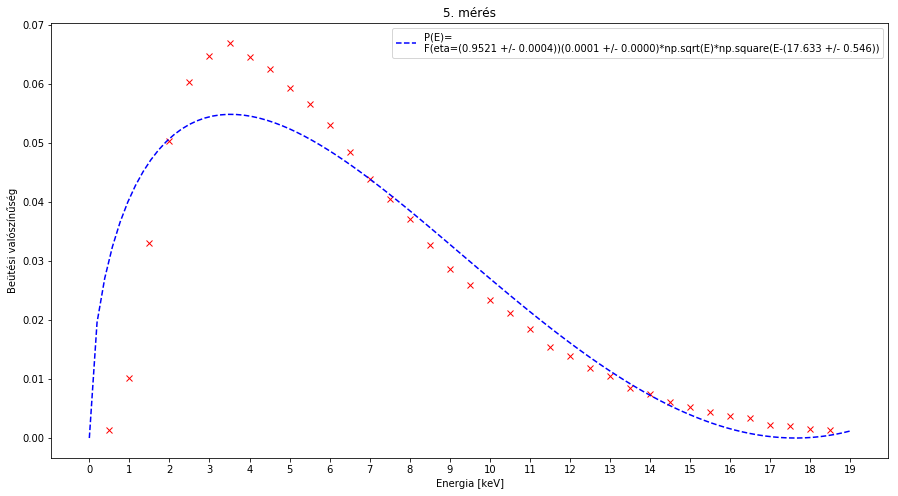

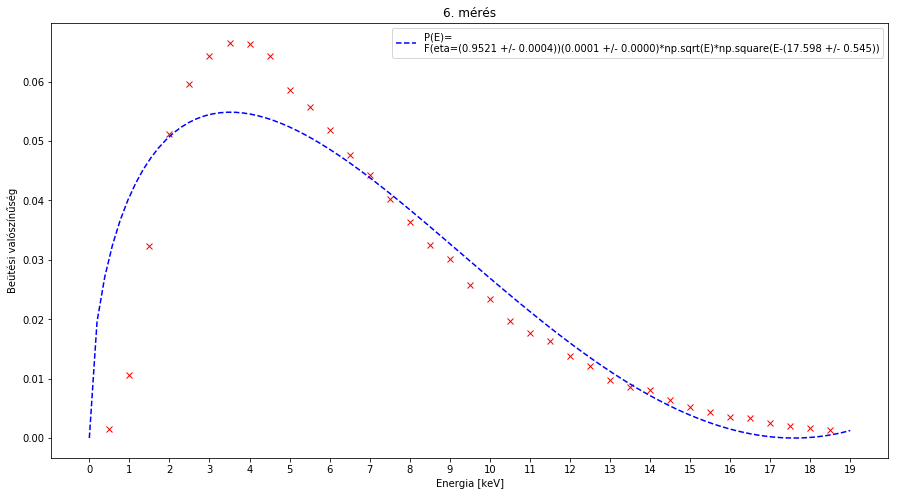

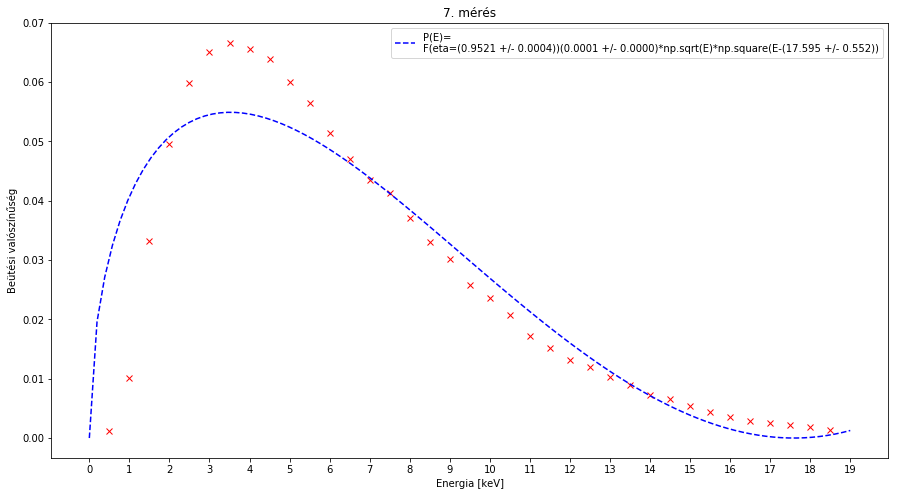

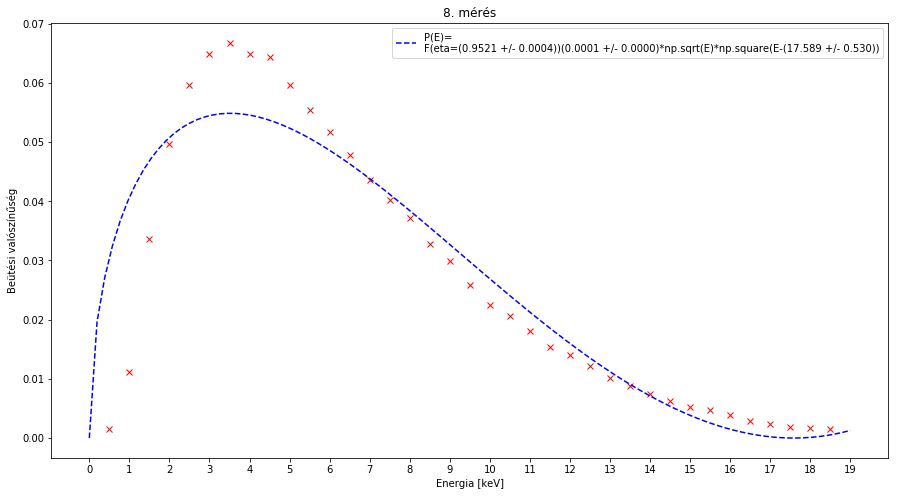

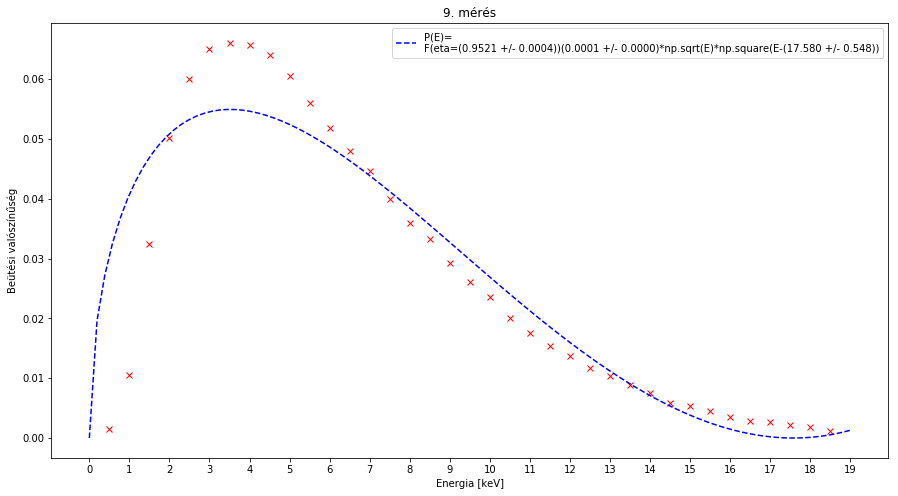

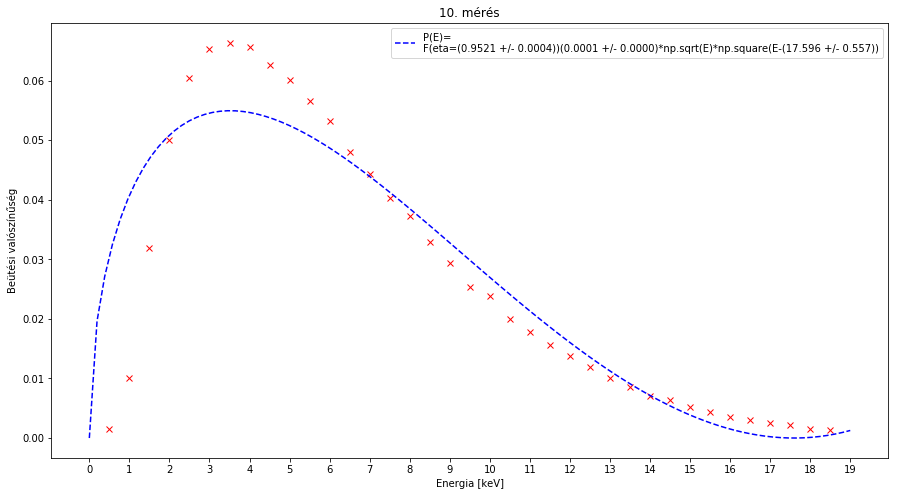

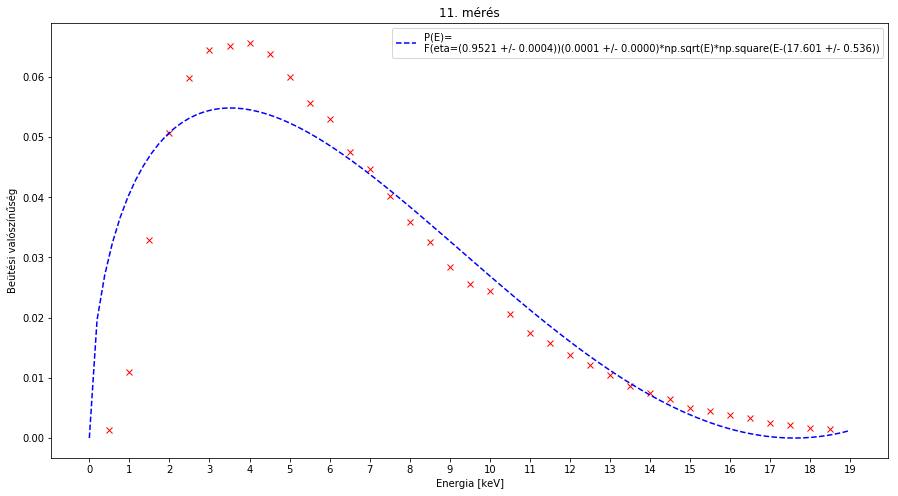

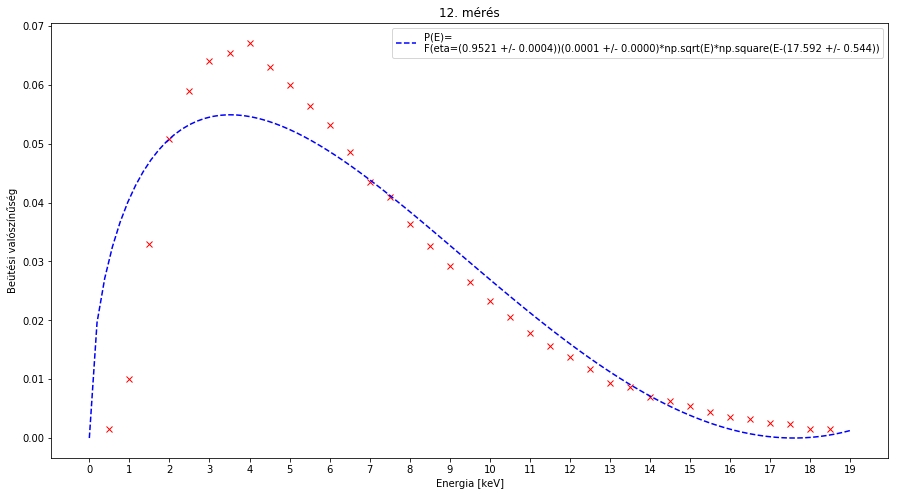

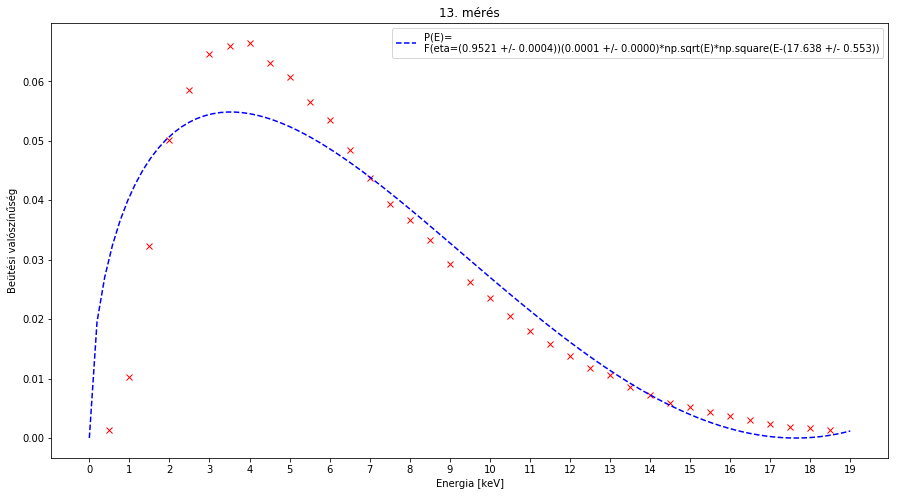

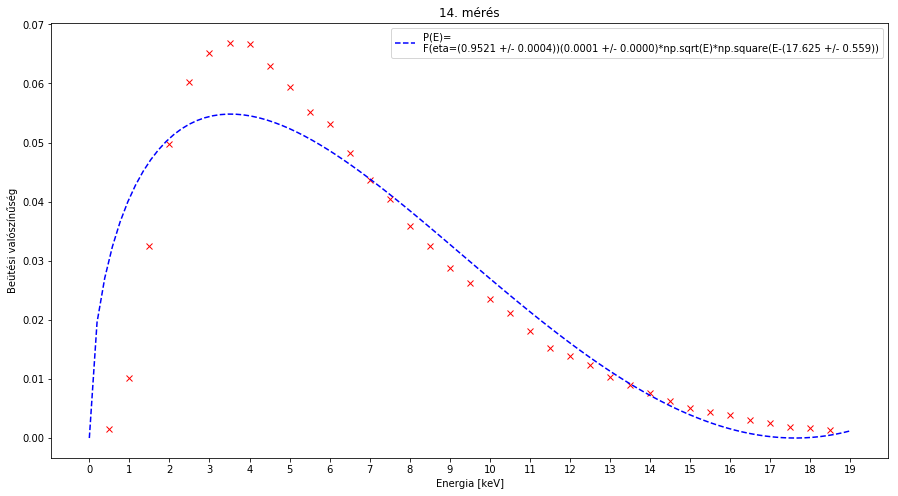

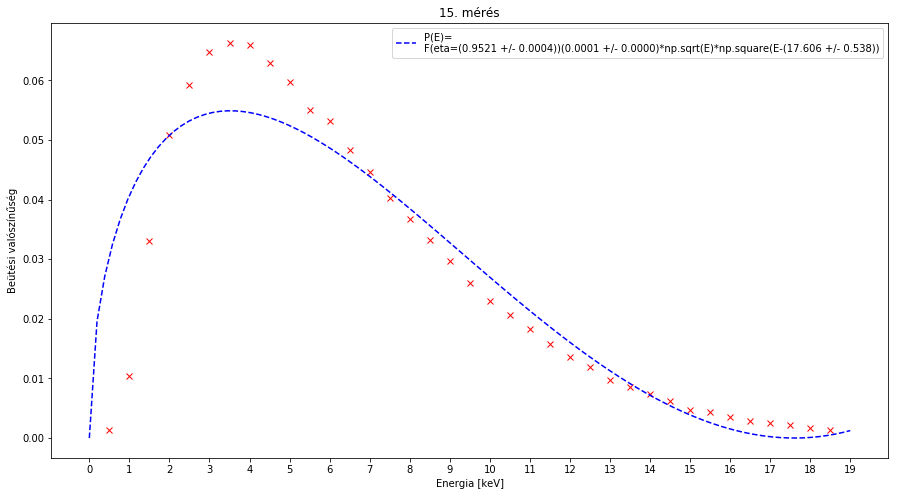

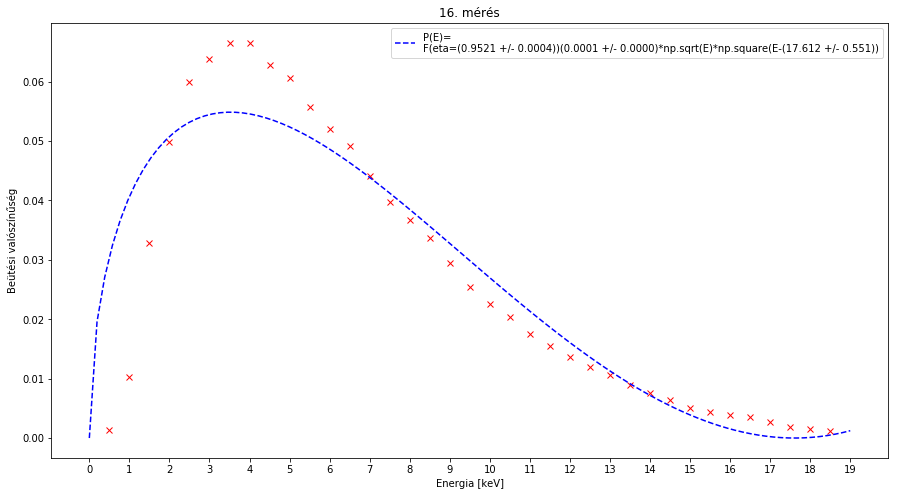

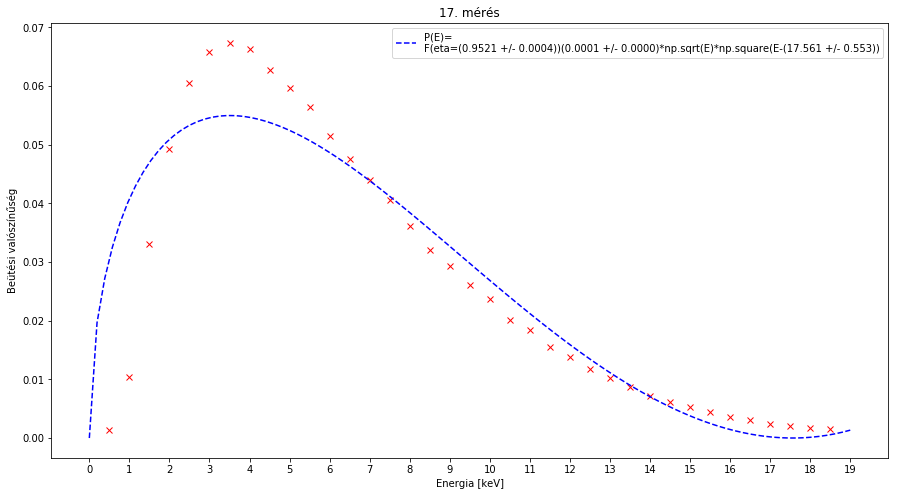

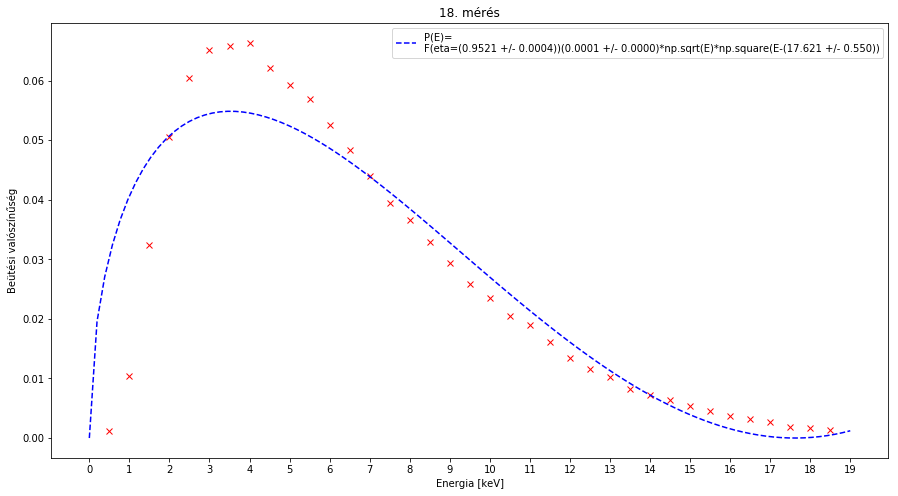

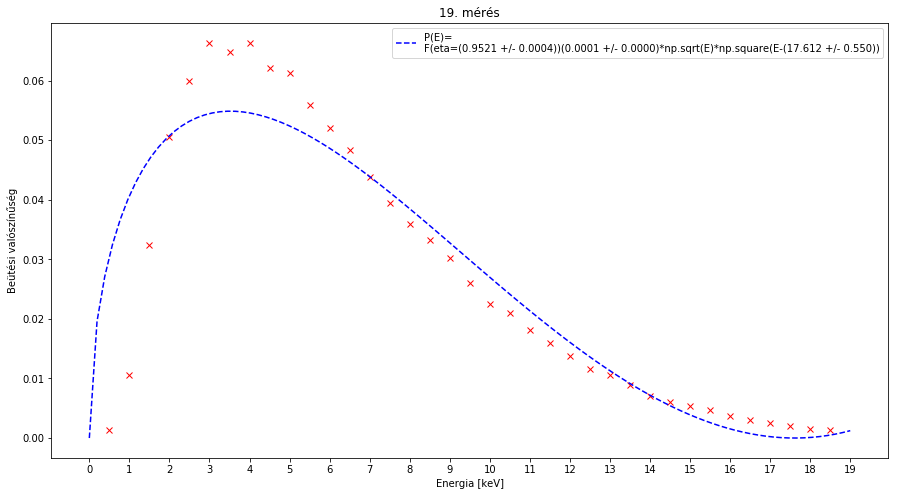

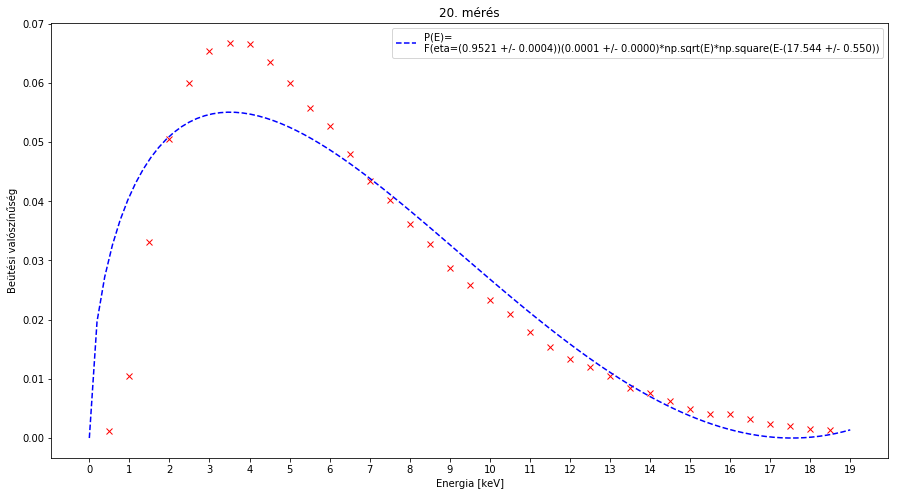

In [24]:
perrsF = []
poptsF = []

for spectrum_ind in range(0, data.shape[0], 1):
    
    def Y(eta):
        return 3./137.*(1 + eta**2)**(1./2.)/eta # Beta - emission
    
    def prob_density_fermi(E, eta):
        return eta**2*prob_density(E, popts[spectrum_ind][0],
                                   popts[spectrum_ind][1])*2*np.pi*Y(eta)/(1-np.exp(-2*np.pi*Y(eta)))
    
    poptF, pcovF = curve_fit(prob_density_fermi, bins,
                             normalize(data[spectrum_ind, :].reshape(1, -1), norm='l1').reshape(bins.shape),
                             p0=[666.])
    perrF = np.diag(pcovF)
    poptsF.append(poptF)
    perrsF.append(perrF)
    
    plt.figure(figsize=(15, 8))
    plt.plot(bins, normalize(data[spectrum_ind, :].reshape(1, -1), norm='l1').reshape(bins.shape), 'rx')
    x = np.linspace(0, 19, 100)
    plt.plot(x, prob_density_fermi(x, poptF[0]), 'b--',
             label='P(E)=\nF(eta=(%.4f +/- %.4f))(%.4f +/- %.4f)*np.sqrt(E)*np.square(E-(%.3f +/- %.3f))' %
             (poptF[0], perrF[0], popts[spectrum_ind][0], perrs[spectrum_ind][0],
              popts[spectrum_ind][1], perrs[spectrum_ind][1]))
    plt.xticks(np.linspace(0, 19, 20))
    plt.xlabel('Energia [keV]')
    plt.ylabel('Beütési valószínűség')
    plt.title('%d. mérés' % (spectrum_ind + 1))
    plt.legend()
    plt.savefig('atlagolt-gorbek-hibakkal-fermi%d.png' % spectrum_ind, dpi=200)
    plt.show()

In [22]:
for i in range(len(poptsF)):
    print("%.4f $\pm$ %.4f & %.4f $\pm$ %.5f & %.3f $\pm$ %.3f \\\ \hline"
          % (poptsF[i][0], perrsF[i][0], popts[i][0], perrs[i][0], popts[i][1], perrs[i][1]))

0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.662 $\pm$ 0.544 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.645 $\pm$ 0.553 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.588 $\pm$ 0.532 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.628 $\pm$ 0.542 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.633 $\pm$ 0.546 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.598 $\pm$ 0.545 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.595 $\pm$ 0.552 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.589 $\pm$ 0.530 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.580 $\pm$ 0.548 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.596 $\pm$ 0.557 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.601 $\pm$ 0.536 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.592 $\pm$ 0.544 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.00000 & 17.638 $\pm$ 0.553 \\ \hline
0.9521 $\pm$ 0.0004 & 0.0001 $\pm$ 0.0